In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [21]:
from sklearn.metrics import f1_score   #metrics专门用来衡量模型结果的包

In [22]:
y_true =  [0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0]
y_pred =  [0,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1]

### 计算F1_Score

In [23]:
f1_score(y_true,y_pred)

0.47058823529411764

In [24]:
f1_score?

In [25]:
from sklearn.metrics import precision_score, recall_score

In [26]:
precision_score(y_true, y_pred)

0.4444444444444444

In [27]:
recall_score(y_true,y_pred)

0.5

In [28]:
y_true =  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0]
y_pred =  [0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0]

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accu=accuracy_score(y_true,y_pred)      #样本对0的预测可以很高  没价值  不常用
prec = precision_score(y_true,y_pred)
reca = recall_score(y_true,y_pred)
F1_score = f1_score(y_true,y_pred)     #对1预测的准确性
print('accuracy = %f, \n \
precision = %f, \n \
recall = %f,\n  \
F1_score = %f '% (accu, prec, reca, F1_score))      

accuracy = 0.720000, 
 precision = 0.166667, 
 recall = 0.333333,
  F1_score = 0.222222 


### 练习计算与画ROC

1. 生成原始数据
2. 使用模型进行分类
3. 用ROC进行效果衡量

In [33]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples=10000,n_features=10,n_classes=2,n_informative=5)  #生成10000个样本数列


In [35]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0) 
#把数据集分为两块 训练集和测试集  测试集大小 0.2    random_state=0  实验可重复 


In [36]:
clf = LogisticRegression()
clf.fit(X_train,y_train)

D:\program\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
from sklearn.metrics import roc_auc_score,roc_curve

preds = clf.predict_proba(X_test)[:,1]
fpr,tpr,_=roc_curve(y_test,preds)

df = pd.DataFrame(dict(fpr=fpr,tpr=tpr))


In [39]:
df.head()

,fpr,tpr
0,0.00000,0.000000
1,0.00000,0.000980
2,0.00000,0.033333
3,0.00102,0.033333
4,0.00102,0.054902


In [40]:
roc_auc= roc_auc_score(y_test,preds)

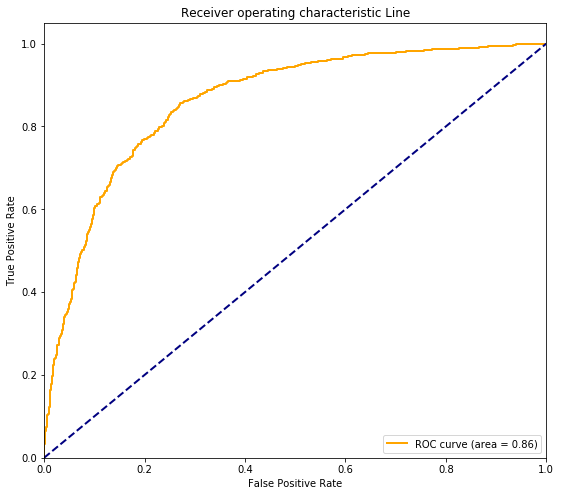

In [41]:
plt.figure(figsize=[9,8])
lw = 2

plt.plot(fpr, tpr, color='orange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Line')
plt.legend(loc="lower right")
plt.show()